In [8]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

matplotlib.use("TkAgg")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [9]:
Ts = 1e-3
t0 = 0
t1 = 10
t = np.arange(t0, t1 + Ts, Ts)

N = len(t)

In [10]:
x1_0 = 0.1
x2_0 = 0.0
x3_0 = 0.1
x4_0 = 0.0

x = np.zeros((N, 4))
P = np.zeros((N, 4, 4))
u = np.zeros((N, 1))

x[0, 0] = x1_0
x[0, 1] = x2_0
x[0, 2] = x3_0
x[0, 3] = x4_0

# From system and optimum criteria
A = np.array([[0, 1, 0, 0], [10.78, 0, 0, 0], [0, 0, 0, 1], [-0.98, 0, 0, 0]])
B = np.array([[0], [-0.2], [0], [0.2]])
Q = np.array([[100, 0, 0, 0], [0, 100, 0, 0], [0, 0, 10, 0], [0, 0, 0, 10]])
R = np.array([[1]])
R_inv = np.linalg.inv(R)

In [11]:
def dot_x1(x: np.ndarray, u: np.float64) -> np.float64:
    return x[1]

def dot_x2(x: np.ndarray, u: np.float64) -> np.float64:
    return 10.78 * x[0] - 0.2 * u

def dot_x3(x: np.ndarray, u: np.float64) -> np.float64:
    return x[3]

def dot_x4(x: np.ndarray, u: np.float64) -> np.float64:
    return -0.98 * x[0] + 0.2 * u

def dot_P(P: np.ndarray) -> np.ndarray:
    return -A.T @ P - P @ A + P @ B @ R_inv @ B.T @ P - Q

In [12]:
eps = 1e-5
iters = 0
w = 0.9999

while iters <= 1000:
    iters += 1
    print(f"Iteration {iters}...")
    
    u_old = u.copy()

    for k in range(N - 1):
        xp_1 = x[k, 0] + Ts * dot_x1(x[k], u[k])
        xp_2 = x[k, 1] + Ts * dot_x2(x[k], u[k])
        xp_3 = x[k, 2] + Ts * dot_x3(x[k], u[k])
        xp_4 = x[k, 3] + Ts * dot_x4(x[k], u[k])

        xp = np.vstack((xp_1, xp_2, xp_3, xp_4))

        x[k + 1, 0] = x[k, 0] + Ts / 2 * (dot_x1(x[k], u[k]) + dot_x1(xp, u[k + 1]))
        x[k + 1, 1] = x[k, 1] + Ts / 2 * (dot_x2(x[k], u[k]) + dot_x2(xp, u[k + 1]))
        x[k + 1, 2] = x[k, 2] + Ts / 2 * (dot_x3(x[k], u[k]) + dot_x3(xp, u[k + 1]))
        x[k + 1, 3] = x[k, 3] + Ts / 2 * (dot_x4(x[k], u[k]) + dot_x4(xp, u[k + 1]))

    for k in range(N - 1):
        P[N - 2 - k] = P[N - 1 - k] - Ts * dot_P(P[N - 1 - k])

    for k in range(N):
        u_new = -R_inv @ B.T @ P[k] @ (x[k].reshape(-1, 1))
        u[k] = w**iters * u[k] + (1 - w**iters) * u_new 

    print(x[len(x) - 1])

    if sum(np.abs(u - u_old)) - eps * sum(np.abs(u)) <= 0:
        break

Iteration 1...
[ 9.08021694e+12  2.98129949e+13 -8.25474267e+11 -2.71027226e+12]
Iteration 2...
[ 9.00244582e+12  2.95571312e+13 -8.16738187e+11 -2.68455865e+12]
Iteration 3...
[ 8.84758638e+12  2.90476546e+13 -7.99356241e+11 -2.63337811e+12]
Iteration 4...
[ 8.61732775e+12  2.82901336e+13 -7.73551726e+11 -2.55734100e+12]
Iteration 5...
[ 8.31434535e+12  2.72933873e+13 -7.39677992e+11 -2.45741360e+12]
Iteration 6...
[ 7.94226616e+12  2.60693719e+13 -6.98213223e+11 -2.33490450e+12]
Iteration 7...
[ 7.50562011e+12  2.46330192e+13 -6.49753099e+11 -2.19144558e+12]
Iteration 8...
[ 7.00977787e+12  2.30020316e+13 -5.95001469e+11 -2.02896782e+12]
Iteration 9...
[ 6.46087630e+12  2.11966357e+13 -5.34759165e+11 -1.84967221e+12]
Iteration 10...
[ 5.86573248e+12  1.92392984e+13 -4.69911166e+11 -1.65599636e+12]
Iteration 11...
[ 5.23174762e+12  1.71544098e+13 -4.01412307e+11 -1.45057725e+12]
Iteration 12...
[ 4.56680232e+12  1.49679370e+13 -3.30271789e+11 -1.23621080e+12]
Iteration 13...
[ 3.87914

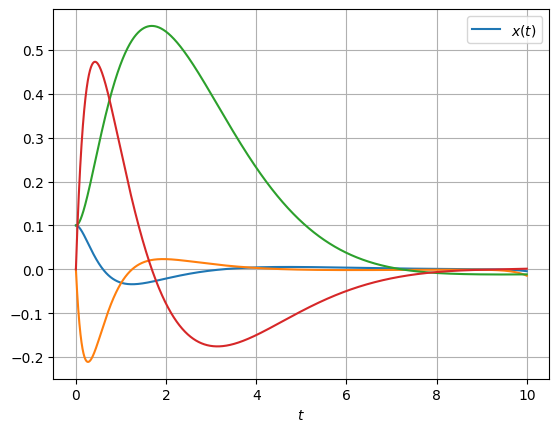

In [13]:
# plt.rcParams["text.usetex"] = True

plt.plot(t, x)
plt.grid()
plt.legend([r"$x(t)$"])
plt.xlabel(r"$t$")

plt.show()


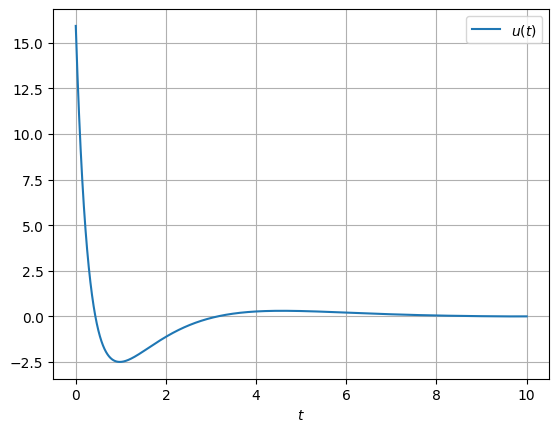

In [14]:
plt.plot(t, u)
plt.grid()
plt.legend([r"$u(t)$"])
plt.xlabel(r"$t$")

plt.show()
